# (NEXT FUNDS)TOPIX連動型上場投信 日足

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

In [3]:
pattern = re.compile(r'(.+)\.T')

symbol = '1306.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='6mo', interval='1d')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-10-01 00:00:00+09:00,2790.0,2825.0,2786.0,2820.0,1196280,0.0,0.0,0.0
2024-10-02 00:00:00+09:00,2780.0,2806.5,2766.0,2773.5,1370840,0.0,0.0,0.0
2024-10-03 00:00:00+09:00,2839.5,2842.5,2806.5,2808.5,1461350,0.0,0.0,0.0
2024-10-04 00:00:00+09:00,2815.5,2829.0,2813.0,2821.5,662860,0.0,0.0,0.0
2024-10-07 00:00:00+09:00,2875.0,2885.5,2862.0,2876.0,3022310,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-03-26 00:00:00+09:00,2962.0,2964.0,2941.5,2956.0,3526550,0.0,0.0,0.0
2025-03-27 00:00:00+09:00,2930.5,2951.5,2925.5,2951.5,2017160,0.0,0.0,0.0
2025-03-28 00:00:00+09:00,2943.5,2948.5,2911.5,2926.5,1554280,0.0,0.0,0.0


In [4]:
df0 = ticker.history(period='max', interval='1d')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2008-01-04 00:00:00+09:00,1138.115112,1138.115112,1138.115112,1138.115112,0,0.0,0.0,0.0
2008-01-07 00:00:00+09:00,1122.502930,1122.502930,1122.502930,1122.502930,0,0.0,0.0,0.0
2008-01-08 00:00:00+09:00,1130.893555,1130.893555,1130.893555,1130.893555,0,0.0,0.0,0.0
2008-01-09 00:00:00+09:00,1147.833496,1147.833496,1147.833496,1147.833496,0,0.0,0.0,0.0
2008-01-10 00:00:00+09:00,1129.430298,1129.430298,1129.430298,1129.430298,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-03-26 00:00:00+09:00,2962.000000,2964.000000,2941.500000,2956.000000,3526550,0.0,0.0,0.0
2025-03-27 00:00:00+09:00,2930.500000,2951.500000,2925.500000,2951.500000,2017160,0.0,0.0,0.0
2025-03-28 00:00:00+09:00,2943.500000,2948.500000,2911.500000,2926.500000,1554280,0.0,0.0,0.0


## 日足チャートとパラボリック SAR

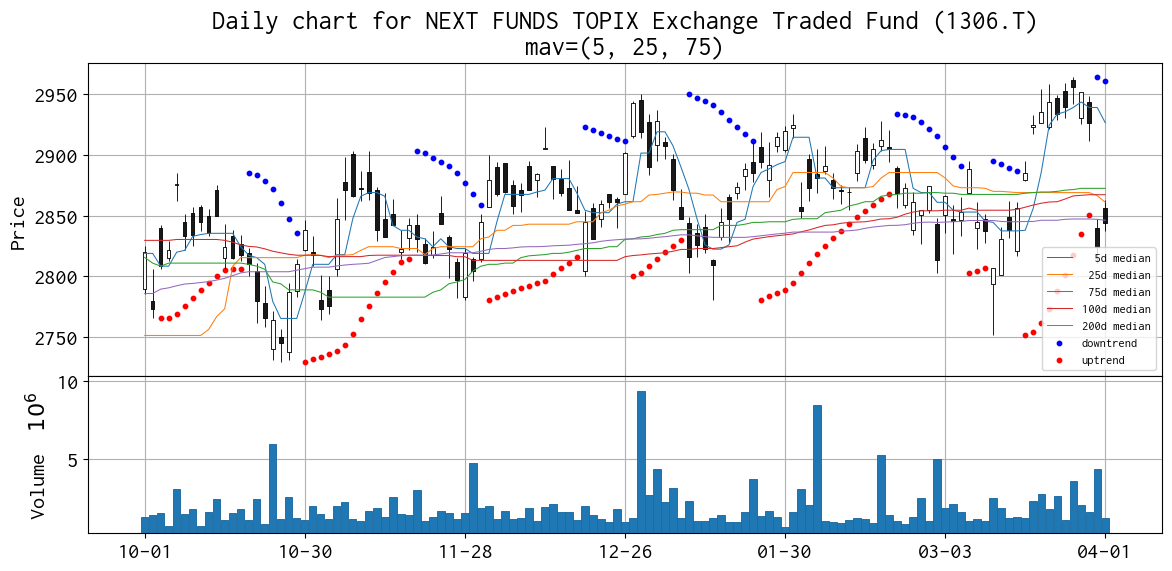

In [5]:
dict_psar = psar(df)

FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm005 = df0['Close'].rolling(5).median()
mm025 = df0['Close'].rolling(25).median()
mm075 = df0['Close'].rolling(75).median()
mm100 = df0['Close'].rolling(100).median()
mm200 = df0['Close'].rolling(200).median()

apds  = [
    mpf.make_addplot(mm005[df.index], width=0.75, label='  5d median', ax=ax[0]),
    mpf.make_addplot(mm025[df.index], width=0.75, label=' 25d median', ax=ax[0]),
    mpf.make_addplot(mm075[df.index], width=0.75, label=' 75d median', ax=ax[0]),
    mpf.make_addplot(mm100[df.index], width=0.75, label='100d median', ax=ax[0]),
    mpf.make_addplot(mm200[df.index], width=0.75, label='200d median', ax=ax[0]),
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=10,
        color='blue',
        label='downtrend',
        ax=ax[0]
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=10,
        color='red',
        label='uptrend',
        ax=ax[0]
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    volume=ax[1],
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

try:
    ax[0].set_title('Daily chart for %s (%s)\nmav=(5, 25, 75)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('Daily chart for %s\nmav=(5, 25, 75)' % symbol)

ax[0].legend(loc='best', fontsize=9)


plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('daily_chart_%s.png' % m.group(1))
else:
    plt.savefig('daily_chart_%s.png' % symbol)

plt.show()

In [6]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-04-01 00:00:00+09:00,2856.5,2863.0,2837.5,2844.0,1172020,0.0,0.0,0.0


In [7]:
df.tail(2)['Close']

Date
2025-03-31 00:00:00+09:00    2824.0
2025-04-01 00:00:00+09:00    2844.0
Name: Close, dtype: float64

In [8]:
df.tail(2)['Close'].diff()

Date
2025-03-31 00:00:00+09:00     NaN
2025-04-01 00:00:00+09:00    20.0
Name: Close, dtype: float64

In [9]:
df['Close'].rolling(5).mean().tail(2)

Date
2025-03-31 00:00:00+09:00    2919.4
2025-04-01 00:00:00+09:00    2900.4
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(25).mean().tail(2)

Date
2025-03-31 00:00:00+09:00    2878.52
2025-04-01 00:00:00+09:00    2877.38
Name: Close, dtype: float64